#EDA and Feature Engineering Flight Price Prediction


In [2]:
#importing basics libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df=pd.read_csv('/content/economy.csv')
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


In [6]:
#check datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        206774 non-null  object
 1   airline     206774 non-null  object
 2   ch_code     206774 non-null  object
 3   num_code    206774 non-null  int64 
 4   dep_time    206774 non-null  object
 5   from        206774 non-null  object
 6   time_taken  206774 non-null  object
 7   stop        206774 non-null  object
 8   arr_time    206774 non-null  object
 9   to          206774 non-null  object
 10  price       206774 non-null  object
dtypes: int64(1), object(10)
memory usage: 17.4+ MB


In [7]:
#check the statistics of the dataset
df.describe()

,num_code
count,206774.000000
mean,1706.096714
std,2320.463721
min,101.000000
25%,588.000000
50%,818.000000
75%,960.000000
max,9991.000000


In [8]:
df.columns

Index(['date', 'airline', 'ch_code', 'num_code', 'dep_time', 'from',
       'time_taken', 'stop', 'arr_time', 'to', 'price'],
      dtype='object')

In [9]:
df.shape

(206774, 11)

In [10]:
#converting date into day,month,year
df['Day']=df['date'].str.split('-').str[0]
df['Month']=df['date'].str.split('-').str[1]
df['Year']=df['date'].str.split('-').str[2]

In [11]:
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,Day,Month,Year
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",11,02,2022
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",11,02,2022
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",11,02,2022
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",11,02,2022
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",11,02,2022


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        206774 non-null  object
 1   airline     206774 non-null  object
 2   ch_code     206774 non-null  object
 3   num_code    206774 non-null  int64 
 4   dep_time    206774 non-null  object
 5   from        206774 non-null  object
 6   time_taken  206774 non-null  object
 7   stop        206774 non-null  object
 8   arr_time    206774 non-null  object
 9   to          206774 non-null  object
 10  price       206774 non-null  object
 11  Day         206774 non-null  object
 12  Month       206774 non-null  object
 13  Year        206774 non-null  object
dtypes: int64(1), object(13)
memory usage: 22.1+ MB


In [13]:
#Convert str dtype to int
df['Day']=df['Day'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        206774 non-null  object
 1   airline     206774 non-null  object
 2   ch_code     206774 non-null  object
 3   num_code    206774 non-null  int64 
 4   dep_time    206774 non-null  object
 5   from        206774 non-null  object
 6   time_taken  206774 non-null  object
 7   stop        206774 non-null  object
 8   arr_time    206774 non-null  object
 9   to          206774 non-null  object
 10  price       206774 non-null  object
 11  Day         206774 non-null  int64 
 12  Month       206774 non-null  int64 
 13  Year        206774 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 22.1+ MB


In [15]:
df.drop('date',axis=1,inplace=True)

In [16]:
df.head()

,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,Day,Month,Year
0,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",11,2,2022
1,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",11,2,2022
2,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",11,2,2022
3,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",11,2,2022
4,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",11,2,2022


In [17]:
#for arrival_time
df['arrival_hours']=df['arr_time'].str.split(':').str[0]
df['arrival_mins']=df['arr_time'].str.split(':').str[1]

#for depature_time
df['depature_hours']=df['dep_time'].str.split(':').str[0]
df['depature_mins']=df['dep_time'].str.split(':').str[1]

In [18]:
df.head()

,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,Day,Month,Year,arrival_hours,arrival_mins,depature_hours,depature_mins
0,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",11,2,2022,21,05,18,55
1,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",11,2,2022,08,40,06,20
2,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",11,2,2022,06,35,04,25
3,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",11,2,2022,12,35,10,20
4,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",11,2,2022,11,10,08,50


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   airline         206774 non-null  object
 1   ch_code         206774 non-null  object
 2   num_code        206774 non-null  int64 
 3   dep_time        206774 non-null  object
 4   from            206774 non-null  object
 5   time_taken      206774 non-null  object
 6   stop            206774 non-null  object
 7   arr_time        206774 non-null  object
 8   to              206774 non-null  object
 9   price           206774 non-null  object
 10  Day             206774 non-null  int64 
 11  Month           206774 non-null  int64 
 12  Year            206774 non-null  int64 
 13  arrival_hours   206774 non-null  object
 14  arrival_mins    206774 non-null  object
 15  depature_hours  206774 non-null  object
 16  depature_mins   206774 non-null  object
dtypes: int64(4), object(13)
memor

In [20]:
df[df.duplicated()]

,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,Day,Month,Year,arrival_hours,arrival_mins,depature_hours,depature_mins
563,Air India,AI,807,17:20,Delhi,15h 15m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,08:35,Mumbai,"12,150",14,2,2022,08,35,17,20
6181,Air India,AI,475,13:00,Delhi,24h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,13:35,Mumbai,"4,780",13,3,2022,13,35,13,00


In [21]:
df['arrival_hours'].unique()

array(['21', '08', '06', '12', '11', '14', '16', '10', '17', '09', '07',
       '18', '20', '19', '22', '13', '23', '15', '00', '01', '02', '04',
       '05', '03'], dtype=object)

<Axes: xlabel='arrival_hours'>

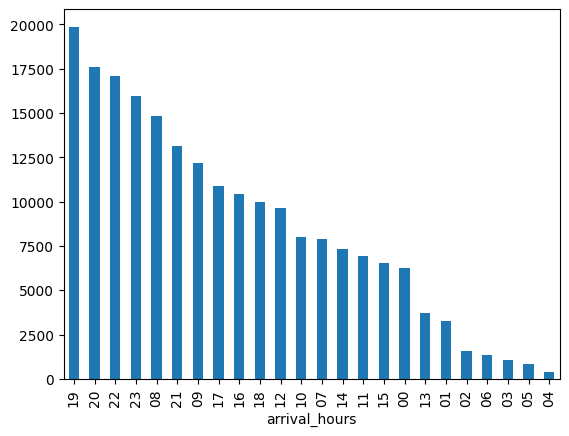

In [23]:
df['arrival_hours'].value_counts().plot(kind='bar')

In [28]:
#droping nan values
df.dropna(inplace=True)

In [29]:
df.isnull().sum()

airline           0
ch_code           0
num_code          0
dep_time          0
from              0
time_taken        0
stop              0
arr_time          0
to                0
price             0
Day               0
Month             0
Year              0
arrival_hours     0
arrival_mins      0
depature_hours    0
depature_mins     0
dtype: int64

In [30]:
#converuting into dtpye integer

df['arrival_hours']=df['arrival_hours'].astype(int)
df['arrival_mins']=df['arrival_mins'].astype(int)
df['depature_hours']=df['depature_hours'].astype(int)
df['depature_mins']=df['depature_mins'].astype(int)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   airline         206774 non-null  object
 1   ch_code         206774 non-null  object
 2   num_code        206774 non-null  int64 
 3   dep_time        206774 non-null  object
 4   from            206774 non-null  object
 5   time_taken      206774 non-null  object
 6   stop            206774 non-null  object
 7   arr_time        206774 non-null  object
 8   to              206774 non-null  object
 9   price           206774 non-null  object
 10  Day             206774 non-null  int64 
 11  Month           206774 non-null  int64 
 12  Year            206774 non-null  int64 
 13  arrival_hours   206774 non-null  int64 
 14  arrival_mins    206774 non-null  int64 
 15  depature_hours  206774 non-null  int64 
 16  depature_mins   206774 non-null  int64 
dtypes: int64(8), object(9)
memory

In [32]:
#drop the columns
df.drop(['arr_time', 'dep_time'],axis=1,inplace=True)

In [33]:
df.head()

,airline,ch_code,num_code,from,time_taken,stop,to,price,Day,Month,Year,arrival_hours,arrival_mins,depature_hours,depature_mins
0,SpiceJet,SG,8709,Delhi,02h 10m,non-stop,Mumbai,"5,953",11,2,2022,21,5,18,55
1,SpiceJet,SG,8157,Delhi,02h 20m,non-stop,Mumbai,"5,953",11,2,2022,8,40,6,20
2,AirAsia,I5,764,Delhi,02h 10m,non-stop,Mumbai,"5,956",11,2,2022,6,35,4,25
3,Vistara,UK,995,Delhi,02h 15m,non-stop,Mumbai,"5,955",11,2,2022,12,35,10,20
4,Vistara,UK,963,Delhi,02h 20m,non-stop,Mumbai,"5,955",11,2,2022,11,10,8,50


In [34]:
df['time_taken_in_hours']=df['time_taken'].str.split(' ').str[0].str.split('h').str[0]   #first method with the help of str.split
df['time_taken_in_mins']=df['time_taken'].str.split(' ').str[1].str.replace('m','')      #2nd method wiht the help of str.replace

In [35]:
df.head()

,airline,ch_code,num_code,from,time_taken,stop,to,price,Day,Month,Year,arrival_hours,arrival_mins,depature_hours,depature_mins,time_taken_in_hours,time_taken_in_mins
0,SpiceJet,SG,8709,Delhi,02h 10m,non-stop,Mumbai,"5,953",11,2,2022,21,5,18,55,02,10
1,SpiceJet,SG,8157,Delhi,02h 20m,non-stop,Mumbai,"5,953",11,2,2022,8,40,6,20,02,20
2,AirAsia,I5,764,Delhi,02h 10m,non-stop,Mumbai,"5,956",11,2,2022,6,35,4,25,02,10
3,Vistara,UK,995,Delhi,02h 15m,non-stop,Mumbai,"5,955",11,2,2022,12,35,10,20,02,15
4,Vistara,UK,963,Delhi,02h 20m,non-stop,Mumbai,"5,955",11,2,2022,11,10,8,50,02,20


In [39]:
df[~df['time_taken_in_hours'].str.isnumeric()]

,airline,ch_code,num_code,from,time_taken,stop,to,price,Day,Month,Year,arrival_hours,arrival_mins,depature_hours,depature_mins,time_taken_in_hours,time_taken_in_mins
96486,GO FIRST,G8,146,Bangalore,1.03h m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Mumbai,"5,177",26,2,2022,9,10,5,45,1.03,
104676,GO FIRST,G8,146,Bangalore,1.02h m,2+-stop,Kolkata,"5,177",26,2,2022,8,0,5,45,1.02,
111315,GO FIRST,G8,146,Bangalore,1.03h m,2+-stop,Hyderabad,"4,337",26,2,2022,9,30,5,45,1.03,
154007,GO FIRST,G8,517,Hyderabad,1.01h m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Delhi,"6,132",25,2,2022,21,50,20,45,1.01,


In [41]:
df.drop(df.index[[96486,104676,111315,154007]],inplace=True)

In [42]:
df['time_taken_in_hours']=df['time_taken_in_hours'].astype(int)
df['time_taken_in_mins']=df['time_taken_in_mins'].astype(int)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206770 entries, 0 to 206773
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   airline              206770 non-null  object
 1   ch_code              206770 non-null  object
 2   num_code             206770 non-null  int64 
 3   from                 206770 non-null  object
 4   time_taken           206770 non-null  object
 5   stop                 206770 non-null  object
 6   to                   206770 non-null  object
 7   price                206770 non-null  object
 8   Day                  206770 non-null  int64 
 9   Month                206770 non-null  int64 
 10  Year                 206770 non-null  int64 
 11  arrival_hours        206770 non-null  int64 
 12  arrival_mins         206770 non-null  int64 
 13  depature_hours       206770 non-null  int64 
 14  depature_mins        206770 non-null  int64 
 15  time_taken_in_hours  206770 non-null  i

In [44]:
#deleting the column
df.drop('time_taken',axis=1,inplace=True)


In [45]:
df.head()

,airline,ch_code,num_code,from,stop,to,price,Day,Month,Year,arrival_hours,arrival_mins,depature_hours,depature_mins,time_taken_in_hours,time_taken_in_mins
0,SpiceJet,SG,8709,Delhi,non-stop,Mumbai,"5,953",11,2,2022,21,5,18,55,2,10
1,SpiceJet,SG,8157,Delhi,non-stop,Mumbai,"5,953",11,2,2022,8,40,6,20,2,20
2,AirAsia,I5,764,Delhi,non-stop,Mumbai,"5,956",11,2,2022,6,35,4,25,2,10
3,Vistara,UK,995,Delhi,non-stop,Mumbai,"5,955",11,2,2022,12,35,10,20,2,15
4,Vistara,UK,963,Delhi,non-stop,Mumbai,"5,955",11,2,2022,11,10,8,50,2,20


In [46]:
df.stop.value_counts()

stop
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t                      162112
non-stop                                                                         27942
2+-stop                                                                          12203
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t                 1063
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t                  588
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Patna\n\t\t\t\t\t\t\t\t\t\t\t\t                432
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore\n\t\t\t\t\t\t\t\t\t\t\t\t               381
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia MYQ\n\t\t\t\t\t\t\t\t\t\t\t\t                  321
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia KLH\n\t\t\t\t\t\t\t\t\t\t\t\t                  284
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Bhubaneswar\n\t\t\t\t\t\t\t\t\t\t\t\t          226
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia JGB\n\t\t\t\t\t\t\t\t\t\t\t\t                  193
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia JR

In [47]:
df['stop']=df['stop'].str.split(' ').str[0].str.split('\n').str[0]

In [48]:
df.stop.unique()

array(['non-stop', '1-stop', '2+-stop'], dtype=object)

In [49]:
df['stop']=df['stop'].map({'non-stop':0, '1-stop':1, '2+-stop':2})

In [50]:
df.stop.dtype

dtype('int64')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206770 entries, 0 to 206773
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   airline              206770 non-null  object
 1   ch_code              206770 non-null  object
 2   num_code             206770 non-null  int64 
 3   from                 206770 non-null  object
 4   stop                 206770 non-null  int64 
 5   to                   206770 non-null  object
 6   price                206770 non-null  object
 7   Day                  206770 non-null  int64 
 8   Month                206770 non-null  int64 
 9   Year                 206770 non-null  int64 
 10  arrival_hours        206770 non-null  int64 
 11  arrival_mins         206770 non-null  int64 
 12  depature_hours       206770 non-null  int64 
 13  depature_mins        206770 non-null  int64 
 14  time_taken_in_hours  206770 non-null  int64 
 15  time_taken_in_mins   206770 non-null  i

In [52]:
df.head()

,airline,ch_code,num_code,from,stop,to,price,Day,Month,Year,arrival_hours,arrival_mins,depature_hours,depature_mins,time_taken_in_hours,time_taken_in_mins
0,SpiceJet,SG,8709,Delhi,0,Mumbai,"5,953",11,2,2022,21,5,18,55,2,10
1,SpiceJet,SG,8157,Delhi,0,Mumbai,"5,953",11,2,2022,8,40,6,20,2,20
2,AirAsia,I5,764,Delhi,0,Mumbai,"5,956",11,2,2022,6,35,4,25,2,10
3,Vistara,UK,995,Delhi,0,Mumbai,"5,955",11,2,2022,12,35,10,20,2,15
4,Vistara,UK,963,Delhi,0,Mumbai,"5,955",11,2,2022,11,10,8,50,2,20


In [53]:
df.price.unique()

array(['5,953', '5,956', '5,955', ..., '2,932', '5,732', '6,541'],
      dtype=object)

In [54]:
df['price']=df['price'].str.replace(',','').astype('int')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206770 entries, 0 to 206773
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   airline              206770 non-null  object
 1   ch_code              206770 non-null  object
 2   num_code             206770 non-null  int64 
 3   from                 206770 non-null  object
 4   stop                 206770 non-null  int64 
 5   to                   206770 non-null  object
 6   price                206770 non-null  int64 
 7   Day                  206770 non-null  int64 
 8   Month                206770 non-null  int64 
 9   Year                 206770 non-null  int64 
 10  arrival_hours        206770 non-null  int64 
 11  arrival_mins         206770 non-null  int64 
 12  depature_hours       206770 non-null  int64 
 13  depature_mins        206770 non-null  int64 
 14  time_taken_in_hours  206770 non-null  int64 
 15  time_taken_in_mins   206770 non-null  i

In [56]:
 df.head()

,airline,ch_code,num_code,from,stop,to,price,Day,Month,Year,arrival_hours,arrival_mins,depature_hours,depature_mins,time_taken_in_hours,time_taken_in_mins
0,SpiceJet,SG,8709,Delhi,0,Mumbai,5953,11,2,2022,21,5,18,55,2,10
1,SpiceJet,SG,8157,Delhi,0,Mumbai,5953,11,2,2022,8,40,6,20,2,20
2,AirAsia,I5,764,Delhi,0,Mumbai,5956,11,2,2022,6,35,4,25,2,10
3,Vistara,UK,995,Delhi,0,Mumbai,5955,11,2,2022,12,35,10,20,2,15
4,Vistara,UK,963,Delhi,0,Mumbai,5955,11,2,2022,11,10,8,50,2,20


In [57]:
df.to.unique()

array(['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi'],
      dtype=object)

In [58]:
df.airline.unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO FIRST', 'Indigo',
       'Air India', 'Trujet', 'StarAir'], dtype=object)

In [59]:
df.ch_code.unique()

array(['SG', 'I5', 'UK', 'G8', '6E', 'AI', '2T', 'S5'], dtype=object)

In [60]:
df['from'].unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [61]:
df['from']=df['from'].map({'Delhi':0,'Mumbai':1})

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206770 entries, 0 to 206773
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   airline              206770 non-null  object 
 1   ch_code              206770 non-null  object 
 2   num_code             206770 non-null  int64  
 3   from                 84074 non-null   float64
 4   stop                 206770 non-null  int64  
 5   to                   206770 non-null  object 
 6   price                206770 non-null  int64  
 7   Day                  206770 non-null  int64  
 8   Month                206770 non-null  int64  
 9   Year                 206770 non-null  int64  
 10  arrival_hours        206770 non-null  int64  
 11  arrival_mins         206770 non-null  int64  
 12  depature_hours       206770 non-null  int64  
 13  depature_mins        206770 non-null  int64  
 14  time_taken_in_hours  206770 non-null  int64  
 15  time_taken_in_mins   2

In [63]:
df.head()

,airline,ch_code,num_code,from,stop,to,price,Day,Month,Year,arrival_hours,arrival_mins,depature_hours,depature_mins,time_taken_in_hours,time_taken_in_mins
0,SpiceJet,SG,8709,0.0,0,Mumbai,5953,11,2,2022,21,5,18,55,2,10
1,SpiceJet,SG,8157,0.0,0,Mumbai,5953,11,2,2022,8,40,6,20,2,20
2,AirAsia,I5,764,0.0,0,Mumbai,5956,11,2,2022,6,35,4,25,2,10
3,Vistara,UK,995,0.0,0,Mumbai,5955,11,2,2022,12,35,10,20,2,15
4,Vistara,UK,963,0.0,0,Mumbai,5955,11,2,2022,11,10,8,50,2,20


In [64]:
#applying one hot encoder
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
encoder.fit_transform(df[['airline','ch_code','to']]).toarray()

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [65]:
df2=pd.DataFrame(encoder.fit_transform(df[['airline','ch_code','to']]).toarray(),columns=encoder.get_feature_names_out())

In [66]:
df3=pd.concat([df,df2],axis=1)

In [67]:
df3.head()

,airline,ch_code,num_code,from,stop,to,price,Day,Month,Year,...,ch_code_I5,ch_code_S5,ch_code_SG,ch_code_UK,to_Bangalore,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai
0,SpiceJet,SG,8709.0,0.0,0.0,Mumbai,5953.0,11.0,2.0,2022.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,SpiceJet,SG,8157.0,0.0,0.0,Mumbai,5953.0,11.0,2.0,2022.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,AirAsia,I5,764.0,0.0,0.0,Mumbai,5956.0,11.0,2.0,2022.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Vistara,UK,995.0,0.0,0.0,Mumbai,5955.0,11.0,2.0,2022.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Vistara,UK,963.0,0.0,0.0,Mumbai,5955.0,11.0,2.0,2022.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [68]:
df3.drop(['airline','ch_code','to'],axis=1,inplace=True)

In [69]:
df3.head()

,num_code,from,stop,price,Day,Month,Year,arrival_hours,arrival_mins,depature_hours,...,ch_code_I5,ch_code_S5,ch_code_SG,ch_code_UK,to_Bangalore,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai
0,8709.0,0.0,0.0,5953.0,11.0,2.0,2022.0,21.0,5.0,18.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,8157.0,0.0,0.0,5953.0,11.0,2.0,2022.0,8.0,40.0,6.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,764.0,0.0,0.0,5956.0,11.0,2.0,2022.0,6.0,35.0,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,995.0,0.0,0.0,5955.0,11.0,2.0,2022.0,12.0,35.0,10.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,963.0,0.0,0.0,5955.0,11.0,2.0,2022.0,11.0,10.0,8.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
